# PROV Templates in Python

     Author: Stephan Kindermann
     Affiliation: DKRZ
     Community: ENES (Earth System Sciences)
     Version: 0.4 (July 2018)
    
**Motivation:**
* The adoption of PROV templates in ENES community workflows is hindered by the following aspects:

    * template generation in ENES oftenly needs to be tool based (template structure depends on project/experiment configuration) 
    * template instanciation in ENES oftenly is done in a scripting environment (most oftenly using python)
    * template expansion currently is only supported by the **provconvert** java tool
    * the transition from Java/provconvert to Python/prov is not fully supported (no import of provconvert output in prov supported) 
   
* The sharing PROV adoption narratives is well supported by using jupyter notebooks and python.
* Core infrastructure services in ENES are implemented using python. 

Therfore: 
* The java based **provconvert** tool thus is difficult to exploit in ENES use cases
* Using prov templates is by now only usefull for "documentation" purposes - no impact on community approaches. 
* To have an impact on community approaches in the short term simple python based wrappers are needed which can be integrated in our community workflows.  

**Approach taken**
A simple template instantiation package (called provtemplates) was implemented supporting the instantiation of prov templates in python.  
This approach on the one hand side allows to generate and use PROV templates in python and which on the other hand side allows for pure python based template instantiations.

Drawback (by now) is that the elaborated prov expansion algorithm is not yet implemented fully. But expansion rules can implemented easyly explicitely in python when needed (and later integrated into the python package). To make the expansion explicit on the basis of python can also seen as an advantage as the community PROV adopters don't need to dig into the expansion algorithm implemented as part of provconvert (and eventual errors therein).

The approach taken is illustrated in the following:   
* PROV templates (being standard PROV documents) are generated in Python based on the prov library alongside PROV template instances.
* A very simple instantiation algorithm is used to instantiate templates based on dictionaries containing the variable settings .. this instantiation algorithm can be stepwise expanded in the future


## Note: New location for provtemplate development 

The provtemplate package is now further developed as part of the ENVRI+ project and development continues at https://github.com/EnvriPlus-PROV/EnvriProvTemplates

## Generate a PROV template
PROV templates are generated in functions with all RROV variables as parameters.
This function is called with prov template variable names to generate prov templates. When called with instances the result is an prov document corresponding to the instantiated prov template.

In the following the approach is illustrated based on a concrete examplec (corresponding to the first example in the provconvert tutorial). 

### Initialize empty PROV template with namespaces needed

In [1]:
# Define namespaces used and generate a new empty 
# python prov template instance
# Define the variable settings in the template as a dictionary

from provtemplates import provconv
import prov.model as prov
import six
import itertools


ns_dict = {
    'prov':'http://www.w3.org/ns/prov#',
    'var':'http://openprovenance.org/var#',
    'vargen':'http://openprovenance.org/vargen#',
    'tmpl':'http://openprovenance.org/tmpl#',
    'foaf':'http://xmlns.com/foaf/0.1/',
    'ex': 'http://example.org/',
    'orcid':'http://orcid.org/',

    #document.set_default_namespace('http://example.org/0/')
    'rdf':'http://www.w3.org/1999/02/22-rdf-syntax-ns#',
    'rdfs':'http://www.w3.org/2000/01/rdf-schema#',
    'xsd':'http://www.w3.org/2001/XMLSchema#',
    'ex1': 'http://example.org/1/',
    'ex2': 'http://example.org/2/'
}

entity_dict = {  
    'var:author':['orcid:0000-0002-3494-120X','orcid:1111-1111-1111-111X'],
    #'var:author':'orcid:0000-0002-3494-120X',
    'var:quote':['ex:quote1','ex:quote2']
}

attr_dict = {
    'var:value':['A Little Provenance Goes a Long Way','Test Test Test'],
    'var:name':'Luc Moreau',    
}

instance_dict = entity_dict.copy()
instance_dict.update(attr_dict)

doc0 = provconv.set_namespaces(ns_dict,prov.ProvDocument())

binding0 = provconv.set_namespaces(ns_dict,prov.ProvDocument())


### Generate an example prov template and print (and store) it's provn representation

In [2]:
bundle = doc0.bundle('vargen:bundleid')
    #bundle.set_default_namespace('http://example.org/0/')
    #bundle = prov_doc (for test with doc without bundles)
quote = bundle.entity('var:quote',(
         ('prov:value','var:value'),
    ))    

author = bundle.agent('var:author',(
        (prov.PROV_TYPE, "prov:Person"),
        ('foaf:name','var:name')
    )) 

bundle.wasAttributedTo('var:quote','var:author')


#doc1 = provconv.save_and_show(doc0,'C:\\Users\\snkin\\Repos\\enes_graph_use_case\\prov_templates\\test\\xxxx')

<ProvAttribution: (var:quote, var:author)>

In [2]:
doc1 = provconv.save_and_show(doc0,'C:\\Users\\snkin\\Repos\\enes_graph_use_case\\prov_templates\\test\\xxxx')

In [6]:
author.get_type()
#author.get_asserted_types()
#test = bundle.entity("var:test")
#test.add_asserted_type()

<QualifiedName: prov:Agent>

In [ ]:
prov.

### Generate an example binding from a python dictionaries

(one for entitities and one for variable bindings)

In [3]:
binding1 = provconv.make_binding(binding0,entity_dict,attr_dict)
print(binding1.get_provn())

document
  prefix var <http://openprovenance.org/var#>
  prefix vargen <http://openprovenance.org/vargen#>
  prefix tmpl <http://openprovenance.org/tmpl#>
  prefix foaf <http://xmlns.com/foaf/0.1/>
  prefix ex <http://example.org/>
  prefix orcid <http://orcid.org/>
  prefix rdf <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
  prefix rdfs <http://www.w3.org/2000/01/rdf-schema#>
  prefix ex1 <http://example.org/1/>
  prefix ex2 <http://example.org/2/>
  prefix tmpl_1 <<http://openprovenance.org/tmpl#>>
  
  entity(var:author, [tmpl:value_0="orcid:0000-0002-3494-120X"])
  entity(var:author, [tmpl:value_1="orcid:1111-1111-1111-111X"])
  entity(var:quote, [tmpl:value_0="ex:quote1"])
  entity(var:quote, [tmpl:value_1="ex:quote2"])
  entity(var:value, [tmpl:2dvalue_0_0="A Little Provenance Goes a Long Way"])
  entity(var:value, [tmpl:2dvalue_1_0="Test Test Test"])
  entity(var:name, [tmpl:2dvalue_0_0="Luc Moreau"])
endDocument


### Convert example to xml 

xml and rdf are the supported exchange formats for python prov (besides provn)


In [4]:
print(doc1.serialize(format='xml'))

<?xml version='1.0' encoding='ASCII'?>
<prov:document xmlns:ex="http://example.org/" xmlns:ex1="http://example.org/1/" xmlns:ex2="http://example.org/2/" xmlns:foaf="http://xmlns.com/foaf/0.1/" xmlns:orcid="http://orcid.org/" xmlns:prov="http://www.w3.org/ns/prov#" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#" xmlns:tmpl="http://openprovenance.org/tmpl#" xmlns:var="http://openprovenance.org/var#" xmlns:vargen="http://openprovenance.org/vargen#" xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
  <prov:bundleContent prov:id="vargen:bundleid">
    <prov:entity prov:id="var:quote">
      <prov:value xsi:type="xsd:string">var:value</prov:value>
    </prov:entity>
    <prov:entity prov:id="var:author">
      <prov:type>prov:Person</prov:type>
      <foaf:name>var:name</foaf:name>
    </prov:entity>
    <prov:wasAttributedTo>
      <prov:entity prov:ref="var:quote"/>
      <prov:agen

## Instantiate prov template

the instantiation is done via the provconf.instantate_template function

for comparison the template file as well as the instance are printed

In [3]:
new = provconv.instantiate_template(doc0,instance_dict)
print(doc0.get_provn())
print(new.get_provn())

document
  prefix var <http://openprovenance.org/var#>
  prefix vargen <http://openprovenance.org/vargen#>
  prefix tmpl <http://openprovenance.org/tmpl#>
  prefix foaf <http://xmlns.com/foaf/0.1/>
  prefix ex <http://example.org/>
  prefix orcid <http://orcid.org/>
  prefix rdf <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
  prefix rdfs <http://www.w3.org/2000/01/rdf-schema#>
  prefix ex1 <http://example.org/1/>
  prefix ex2 <http://example.org/2/>
  
  bundle vargen:bundleid
    prefix foaf <http://xmlns.com/foaf/0.1/>
    
    entity(var:quote, [prov:value="var:value"])
    agent(var:author, [prov:type="prov:Person", foaf:name="var:name"])
    wasAttributedTo(var:quote, var:author)
  endBundle
endDocument
document
  prefix ex <http://example.org/>
  prefix orcid <http://orcid.org/>
  prefix ex1 <http://example.org/1/>
  prefix rdfs <http://www.w3.org/2000/01/rdf-schema#>
  prefix var <http://openprovenance.org/var#>
  prefix foaf <http://xmlns.com/foaf/0.1/>
  prefix tmpl <http://op

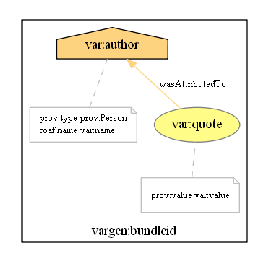

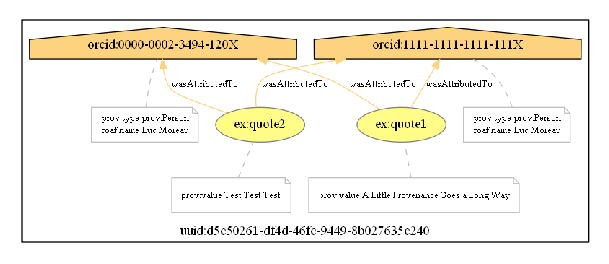

In [4]:
%matplotlib  inline
doc1.plot()
new.plot()

## Compare with original ProvToolbox example: 

In [ ]:
# %load Downloads/ProvToolbox-Tutorial4-0.7.0/src/main/resources/template1.provn

document

  prefix var <http://openprovenance.org/var#>
  prefix vargen <http://openprovenance.org/vargen#>
  prefix tmpl <http://openprovenance.org/tmpl#>

  prefix foaf <http://xmlns.com/foaf/0.1/>
  
  bundle vargen:bundleId
    entity(var:quote, [prov:value='var:value'])
    entity(var:author, [prov:type='prov:Person', foaf:name='var:name'])
    wasAttributedTo(var:quote,var:author)
  endBundle

endDocument


In [ ]:
# take same instantiation as in the tutorial:
# %load Downloads/ProvToolbox-Tutorial4-0.7.0/src/main/resources/binding1.ttl
@prefix prov: <http://www.w3.org/ns/prov#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix tmpl: <http://openprovenance.org/tmpl#> .
@prefix var: <http://openprovenance.org/var#> .
@prefix ex: <http://example.com/#> .

var:author a prov:Entity;
           tmpl:value_0 <http://orcid.org/0000-0002-3494-120X>.
var:name   a prov:Entity;
           tmpl:2dvalue_0_0 "Luc Moreau".
var:quote  a prov:Entity;
           tmpl:value_0 ex:quote1.
var:value  a prov:Entity;
           tmpl:2dvalue_0_0 "A Little Provenance Goes a Long Way".



## Instantiate PROV template using provconvert and compare results

the python prov implementation does not support deserialization form provn and ttl -
thus converting to xml or rdf is necessary ..

In [ ]:
!provconvert -infile test/template1.provn -bindings test/binding1.ttl -outfile test/doc1.provn

In [ ]:
!provconvert -infile test/template1.provn -outfile test/template1.xml

In [ ]:
!provconvert -infile test/binding1.ttl -outfile test/binding1.xml

In [ ]:
!provconvert -infile test/doc1.provn -outfile test/doc1.xml

In [ ]:
!provconvert -infile test/template1.provn  -outfile test/template1.rdf

In [ ]:
!provconvert -infile test/doc1.provn -outfile test/doc1.rdf

In [ ]:
# import template and generated provn representation in python
with open('test/template1.xml') as in_file:
    prov_d = prov.ProvDocument()
    prov_d = prov_d.deserialize(source=in_file,format='xml')
    
with open('test/binding1.xml') as in_file:
    prov_t = prov.ProvDocument()
    prov_t = prov_d.deserialize(source=in_file,format='xml')    


with open('test/doc1.xml') as in_file:
    prov_i = prov.ProvDocument()
    prov_i = prov_d.deserialize(source=in_file,format='xml')
    
print(prov_d.get_provn()) 
print(prov_t.get_provn())
print(prov_i.get_provn())

print(prov_i.serialize(format='rdf'))

In [ ]:
# %load test/doc1.provn
document
bundle uuid:672b425e-a7db-470f-8653-7318d9ae8ec1
prefix foaf <http://xmlns.com/foaf/0.1/>
prefix pre_0 <http://orcid.org/>
prefix ex <http://example.com/#>
prefix uuid <urn:uuid:>

entity(ex:quote1,[prov:value = "A Little Provenance Goes a Long Way" %% xsd:string])
entity(pre_0:0000-0002-3494-120X,[prov:type = 'prov:Person', foaf:name = "Luc Moreau" %% xsd:string])
wasAttributedTo(ex:quote1, pre_0:0000-0002-3494-120X)
endBundle
endDocument


In [ ]:
!provconvert -infile test/doc1.provn -outfile test/doc1.png


In [ ]:
!provconvert -infile test/template1.provn -outfile test/template1.png

In [ ]:
# %load Downloads/ProvToolbox-Tutorial4-0.7.0/target/doc1.provn
document
bundle uuid:4c7236d5-6420-4a88-b192-6089e27aa88e
prefix foaf <http://xmlns.com/foaf/0.1/>
prefix pre_0 <http://orcid.org/>
prefix ex <http://example.com/#>
prefix uuid <urn:uuid:>

entity(ex:quote1,[prov:value = "A Little Provenance Goes a Long Way" %% xsd:string])
entity(pre_0:0000-0002-3494-120X,[prov:type = 'prov:Person', foaf:name = "Luc Moreau" %% xsd:string])
wasAttributedTo(ex:quote1, pre_0:0000-0002-3494-120X)
endBundle
endDocument


# Show provconvert result to compare

![in](./test/doc1.png)
![out](./test/doc2.png)

## Test: try bokeh for graph visualization

In [10]:
import networkx as nx
from bokeh.models import Range1d, Plot
from bokeh.models.graphs import from_networkx

In [9]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

In [18]:
#prov.graph.prov_to_graph(prov_document)
import prov.graph as graph
nwx = graph.prov_to_graph(doc1)
plot = Plot(x_range=Range1d(1, 10), y_range=Range1d(1, 10))

# Create a Bokeh graph from the NetworkX input using nx.spring_layout
graph = from_networkx(nwx, nx.spring_layout, scale=1.8, center=(0,0))
plot.renderers.append(graph)
show(plot)


NodeView(())